In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-pwlin-converge)

We measure the convergence rate for piecewise linear interpolation of $e^{\sin 7x}$ over $x \in [0,1]$.

In [2]:
f = lambda x: exp(sin(7 * x))
x = linspace(0, 1, 10000)  # sample the difference at many points
N = 2 ** arange(3, 11)
err = zeros(N.size)
for i, n in enumerate(N):
    t = linspace(0, 1, n + 1)  # interpolation nodes
    p = FNC.plinterp(t, f(t))
    err[i] = max(abs(f(x) - p(x)))
print(err)

[2.16029984e-01 6.38173511e-02 1.60381329e-02 4.05882168e-03
 1.01556687e-03 2.54022468e-04 6.35007579e-05 1.58778800e-05]


As predicted, a factor of 10 in $n$ produces a factor of 100 in the error. In a convergence plot, it is traditional to have $h$ *decrease* from left to right, so we expect a straight line of slope $-2$ on a log-log plot.

<>:5: SyntaxWarning: invalid escape sequence '\|'
<>:5: SyntaxWarning: invalid escape sequence '\|'
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_34519/3762891352.py:5: SyntaxWarning: invalid escape sequence '\|'
  ylabel("$\|f-p\|_\infty$")


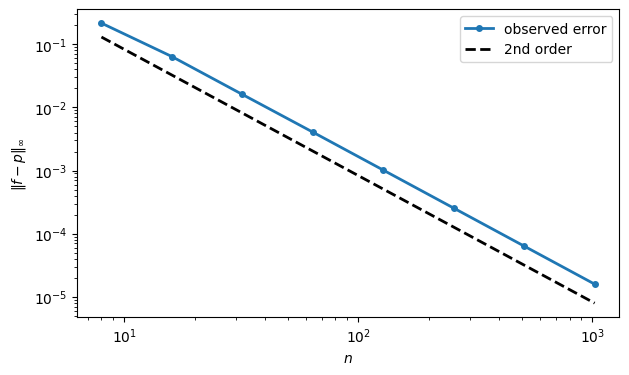

In [3]:
order2 = 0.5 * err[-1] * (N / N[-1]) ** (-2)
loglog(N, err, "-o", label="observed error")
loglog(N, order2, "k--", label="2nd order")
xlabel("$n$")
ylabel("$\|f-p\|_\infty$")
legend();